<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e; font-size:150%;'> 
    Code Library, Style, & Links</h1>

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d');
span {font-family:'Roboto'; color:black; text-shadow:4px 4px 4px slategray;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:#ff355e;}      
</style>

In [2]:
import numpy as np,pandas as pd
import os,h5py,warnings,urllib
import tensorflow as tf,pylab as pl
from tensorflow import image as timg
import tensorflow.keras.layers as tfkl
import tensorflow.keras.applications as tfka
import tensorflow_hub as th
from sklearn.metrics import confusion_matrix,\
classification_report
from IPython.core.magic import register_line_magic
warnings.filterwarnings('ignore')
pl.style.use('seaborn-whitegrid')
style_dict={'background-color':'silver','color':'#ff355e', 
            'border-color':'white','font-family':'Roboto'}
fpath='../input/quick-draw-images-from-key-points/'
fpath2='../input/quick-draw-images-from-key-points-2/'
fpath3='../input/quick-draw-images-from-key-points-3/'
fpath4='../input/quick-draw-images-from-key-points-4/'
files=sorted(os.listdir(fpath))
files2=sorted(os.listdir(fpath2))
files3=sorted(os.listdir(fpath3))
files4=sorted(os.listdir(fpath4))
files2=files2[1:]+[files2[0]]
[files,files2,files3,files4]

[['QuickDrawImages1.h5',
  'QuickDrawImages2.h5',
  'QuickDrawImages3.h5',
  'QuickDrawImages4.h5',
  'QuickDrawImages5.h5'],
 ['QuickDrawImages6.h5',
  'QuickDrawImages7.h5',
  'QuickDrawImages8.h5',
  'QuickDrawImages9.h5',
  'QuickDrawImages10.h5'],
 ['QuickDrawImages11.h5',
  'QuickDrawImages12.h5',
  'QuickDrawImages13.h5',
  'QuickDrawImages14.h5',
  'QuickDrawImages15.h5'],
 ['QuickDrawImages16.h5',
  'QuickDrawImages17.h5',
  'QuickDrawImages18.h5',
  'QuickDrawImages19.h5',
  'QuickDrawImages20.h5']]

<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e; font-size:150%;'> 
    Data Construction</h1>

In [3]:
labels=['The Eiffel Tower','The Great Wall of China',
        'The Mona Lisa','airplane',
        'alarm clock','ambulance','angel',
        'animal migration','ant','anvil',
        'apple','arm','asparagus','axe','backpack',
        'banana','bandage','barn','baseball bat','baseball',
        'basket','basketball','bat','bathtub','beach',
        'bear','beard','bed','bee','belt',
        'bench','bicycle','binoculars','bird',
        'birthday cake','blackberry','blueberry',
        'book','boomerang','bottlecap',
        'bowtie','bracelet','brain','bread','bridge',
        'broccoli','broom','bucket','bulldozer','bus',
        'bush','butterfly','cactus','cake','calculator',
        'calendar','camel','camera','camouflage','campfire',
        'candle','cannon','canoe','car','carrot',
        'castle','cat','ceilingfan','cellphone','cello',
        'chair','chandelier','church','circle','clarinet',
        'clock','cloud','coffee_cup','compass','computer',
        'cookie','cooler','couch','cow','crab',
        'crayon','crocodile','crown','cruise_ship','cup',
        'diamond','dishwasher','diving_board','dog',
        'dolphin','donut','door','dragon','dresser','drill',
        'drums','duck','dumbbell','ear','elbow',
        'elephant','envelope','eraser','eye','eyeglasses',
        'face','fan','feather','fence','finger','fire_hydrant',
        'fireplace','firetruck','fish','flamingo',
        'flashlight','flipflops','floorlamp','flower','flyingsaucer',
        'foot','fork','frog','fryingpan','garden_hose',
        'garden','giraffe','goatee','golf_club','grapes',
        'grass','guitar','hamburger','hammer','hand',
        'harp','hat','headphones','hedgehog','helicopter', 
        'helmet','hexagon','hockeypuck','hockeystick','horse',
        'hospital','hot_air_balloon','hot_dog','hot_tub','hourglass',
        'house_plant','house','hurricane','ice_cream','jacket',
        'jail','kangaroo','key','keyboard','knee','ladder',
        'lantern','laptop','leaf','leg','light_bulb','lighthouse',
        'lightning','line','lion','lipstick','lobster','lollipop',
        'mailbox','map','marker','matches','megaphone','mermaid',
        'microphone','microwave','monkey','moon','mosquito',
        'motorbike','mountain','mouse','moustache','mouth','mug',
        'mushroom','nail','necklace','nose','ocean']

In [4]:
@register_line_magic
def data_files(n):
    global x,y,D
    if n=='1': fp=fpath; fns=files
    if n=='2': fp=fpath2; fns=files2
    if n=='3': fp=fpath3; fns=files3
    if n=='4': fp=fpath4; fns=files4
    for i in range(5):
        f=h5py.File(fp+fns[i],'r')
        keys=list(f.keys())
        x+=[f[keys[0]][i*10000:i*10000+D] 
            for i in range(10)]
        y+=[f[keys[1]][i*10000:i*10000+D]
            for i in range(10)]    

In [5]:
D=200; x=[]; y=[]
%data_files 1
%data_files 2
%data_files 3
%data_files 4

In [6]:
x=np.array(x)
num_classes=x.shape[0]
x=x.reshape(num_classes*D,96,96,1)
img_size=96
x=timg.resize(x,[img_size,img_size])
x=timg.grayscale_to_rgb(x).numpy()
y=np.array(y).reshape(num_classes*D)
N=y.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x.shape,y.shape

((40000, 96, 96, 3), (40000,))

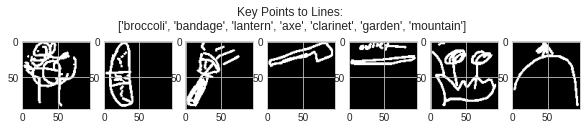

In [7]:
nn=np.random.randint(0,N,7)
ll=[labels[y[nn[i]]] for i in range(7)]
pl.figure(figsize=(10,2))
for i in range(7):
    pl.subplot(1,7,i+1)
    pl.imshow(x[nn[i]])
pl.suptitle('Key Points to Lines: \n%s'%ll);

In [8]:
x_test,x_valid,x_train=x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=y[:n],y[n:2*n],y[2*n:]
del x,y,shuffle_ids

<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e; font-size:150%;'> 
    TFHub Models</h1>

In [9]:
def premodel(pix,den,mh,lbl,activ,loss):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((pix,pix,3),
                              name='input'),
        th.KerasLayer(mh,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(den,activation='relu'),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(lbl,activation=activ)])
    model.compile(optimizer='adam',
                  metrics=['accuracy'],loss=loss)
    display(model.summary())
    return model
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [10]:
fw='weights.best.cv001-%s'%num_classes+'.hdf5'
[handle_base,pixels]=["mobilenet_v2_050_96",img_size]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [11]:
model=premodel(pixels,2048,mhandle,num_classes,
               'softmax','sparse_categorical_crossentropy')
history=model.fit(x=x_train,y=y_train,batch_size=128,
                  epochs=7,callbacks=cb(fw),
                  validation_data=(x_valid,y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              706224    
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              2623488   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               409800    
Total params: 3,739,512
Trainable params: 3,720,968
Non-trainable params: 18,544
_________________________________________________________________


None

Epoch 1/7
250/250 [==============================] - ETA: 0s - loss: 2.7563 - accuracy: 0.3794
Epoch 00001: val_loss improved from inf to 2.48345, saving model to weights.best.cv001-200.hdf5
250/250 [==============================] - 22s 89ms/step - loss: 2.7563 - accuracy: 0.3794 - val_loss: 2.4835 - val_accuracy: 0.4160 - lr: 0.0010
Epoch 2/7
250/250 [==============================] - ETA: 0s - loss: 1.7988 - accuracy: 0.5596
Epoch 00002: val_loss improved from 2.48345 to 2.02674, saving model to weights.best.cv001-200.hdf5
250/250 [==============================] - 21s 83ms/step - loss: 1.7988 - accuracy: 0.5596 - val_loss: 2.0267 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 3/7
250/250 [==============================] - ETA: 0s - loss: 1.5066 - accuracy: 0.6253
Epoch 00003: val_loss improved from 2.02674 to 1.94506, saving model to weights.best.cv001-200.hdf5
250/250 [==============================] - 21s 83ms/step - loss: 1.5066 - accuracy: 0.6253 - val_loss: 1.9451 - val_accuracy: 0

In [12]:
model.load_weights(fw)
model.evaluate(x_test,y_test)

125/125 [==============================] - 1s 7ms/step - loss: 1.6886 - accuracy: 0.6037


[1.688613772392273, 0.6037499904632568]